In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv')
print(df.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -11

In [3]:
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81.1781      3495   
1  43039 Riley Greens Suite 39

In [4]:
# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03   
std    3.019564e+05  1.284128e+07  5.109788e+00  1.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
# Drop unnecessary columns
df = df.drop(columns=['trans_date_trans_time', 'trans_num', 'unix_time', 'dob', 'first', 'last'])

# Handle missing values
df['merch_zipcode'] = df['merch_zipcode'].fillna(-1)  # Using -1 as a placeholder for missing values



In [7]:
print(df)

                      cc_num                             merchant  \
0           2703186189652095           fraud_Rippin, Kub and Mann   
1               630423337322      fraud_Heller, Gutmann and Zieme   
2             38859492057661                 fraud_Lind-Buckridge   
3           3534093764340240   fraud_Kutch, Hermiston and Farrell   
4            375534208663984                  fraud_Keeling-Crist   
...                      ...                                  ...   
1296670       30263540414123                    fraud_Reichel Inc   
1296671     6011149206456997             fraud_Abernathy and Sons   
1296672     3514865930894695                 fraud_Stiedemann Ltd   
1296673     2720012583106919  fraud_Reinger, Weissnat and Strosin   
1296674  4292902571056973207  fraud_Langosh, Wintheiser and Hyatt   

              category     amt gender                         street  \
0             misc_net    4.97      F                 561 Perry Cove   
1          grocery_pos  107

In [8]:
# Separate features and target variable
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# List of categorical columns
categorical_features = ['merchant', 'category', 'gender', 'city', 'state', 'job']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), ['amt', 'cc_num', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'merch_zipcode'])  # Adjust numerical columns as needed
    ]
)


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline with preprocessing and Logistic Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9940128996434475
Confusion Matrix:
 [[386536    182]
 [  2147    138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386718
           1       0.43      0.06      0.11      2285

    accuracy                           0.99    389003
   macro avg       0.71      0.53      0.55    389003
weighted avg       0.99      0.99      0.99    389003



In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessor into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[348246  38472]
 [   427   1858]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    386718
           1       0.05      0.81      0.09      2285

    accuracy                           0.90    389003
   macro avg       0.52      0.86      0.52    389003
weighted avg       0.99      0.90      0.94    389003



Best Threshold: 0.9662
Best F1 Score: 0.3743


/tmp/ipykernel_18/244848082.py:12: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


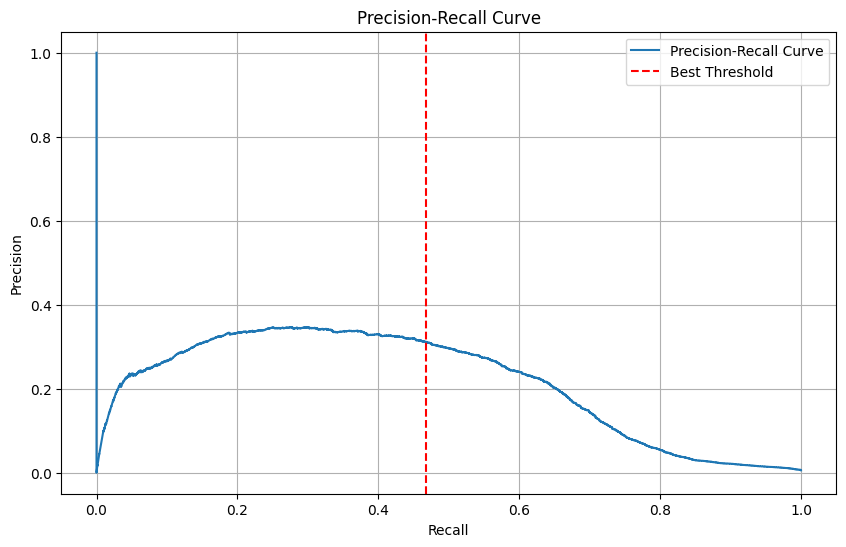

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_processed)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate F1 scores for different thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores[np.isnan(f1_scores)] = 0  # Handle division by zero

# Find the threshold that gives the maximum F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Print the best threshold and corresponding F1 score
print(f'Best Threshold: {best_threshold:.4f}')
print(f'Best F1 Score: {f1_scores[best_threshold_index]:.4f}')

# Plot Precision-Recall curve and F1 score
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.axvline(x=recall[best_threshold_index], color='r', linestyle='--', label='Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()



Precision for Class 1 is very low (0.05), indicating that when the model predicts fraud, it is rarely correct.
Recall for Class 1 is high (0.81), meaning the model identifies most of the actual fraud cases.
Overall Accuracy is 0.90, but this includes the performance on both classes. The low precision for Class 1 affects the balanced evaluation

